# LIVRABLE 2 (GROUPE1)
intelligence artificielle

# Membre du groupe:


ALLECHE FATEN 
CHARLUT STEVEN 
YANN SUBTS

# Importation des données:

In [1]:
# compatibilité python 2 et python 3
from __future__ import division, print_function, unicode_literals

# General imports
import os
import tarfile
from six.moves import urllib
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math
from datetime import datetime
from scipy.stats import randint
from zipfile import ZipFile

# Pipelines imports
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

# Models imports
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

# Validations imports
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

In [2]:
import numpy as np
import os
import pandas as pd
import sklearn
from datetime import datetime
import math
from numpy.random import default_rng
# stabilité du notebook d'une exécution à l'autre
random=default_rng(42)
np.random.seed(42)
RANDOM_SEED = 42
# jolies figures directement dans le notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "workflowDS"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Merge des différentes sources de données

In [3]:
DATA_PATH = "./DATA/"
inout_zip = "in_out_time.zip"

def fetch_data(data_path=DATA_PATH):
    if not os.path.isdir(data_path):
        os.makedirs(data_path)
    zip_path = os.path.join(data_path, inout_zip)
    with ZipFile(zip_path, "r") as file_zip:
        file_zip.extractall(path=data_path)
        file_zip.close()

def load_data(data_file, data_path=DATA_PATH):
    csv_path = os.path.join(data_path, data_file)
    df = pd.read_csv(csv_path)
    return df

In [4]:
fetch_data() #Unzip

#Get the data
general_data = load_data("general_data.csv")
empSurvey_data = load_data("employee_survey_data.csv")
manSurvey_data = load_data("manager_survey_data.csv")
intime_data = load_data("in_time.csv")
outtime_data = load_data("out_time.csv")

intime_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True ) #Replace the name of the 1st column
outtime_data.rename( columns={'Unnamed: 0':'EmployeeID'}, inplace=True )

In [5]:
general_data.head(10)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,3.0,Y,13,8,0,28.0,5,7,7,7
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2.0,Y,20,8,1,5.0,2,0,0,0
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2.0,Y,22,8,3,10.0,2,0,0,0
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,0.0,Y,21,8,0,10.0,2,9,7,8
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,1.0,Y,13,8,1,6.0,2,6,1,5


In [6]:
general_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [7]:
general_data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


# Visualisation des données sous forme d'histogrammes:

La visualisation de données est un ensemble de techniques utilisées pour communiquer des informations sous forme d’objets visuels. On peut utiliser différents types de graphique.

Pouvoir visualiser ses données lorsqu’on les manipule est une nécessité. Observer des graphiques nous permet d’anticiper certains problèmes et de mieux peaufiner nos futures analyses.


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>],
       [<AxesSubplot:title={'center':'EmployeeID'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>],
       [<AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>,
        <AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>],
       [<AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>,
        <AxesSubplot:title={'center':'YearsWithCurrManager'}>]],
      dtype=object)

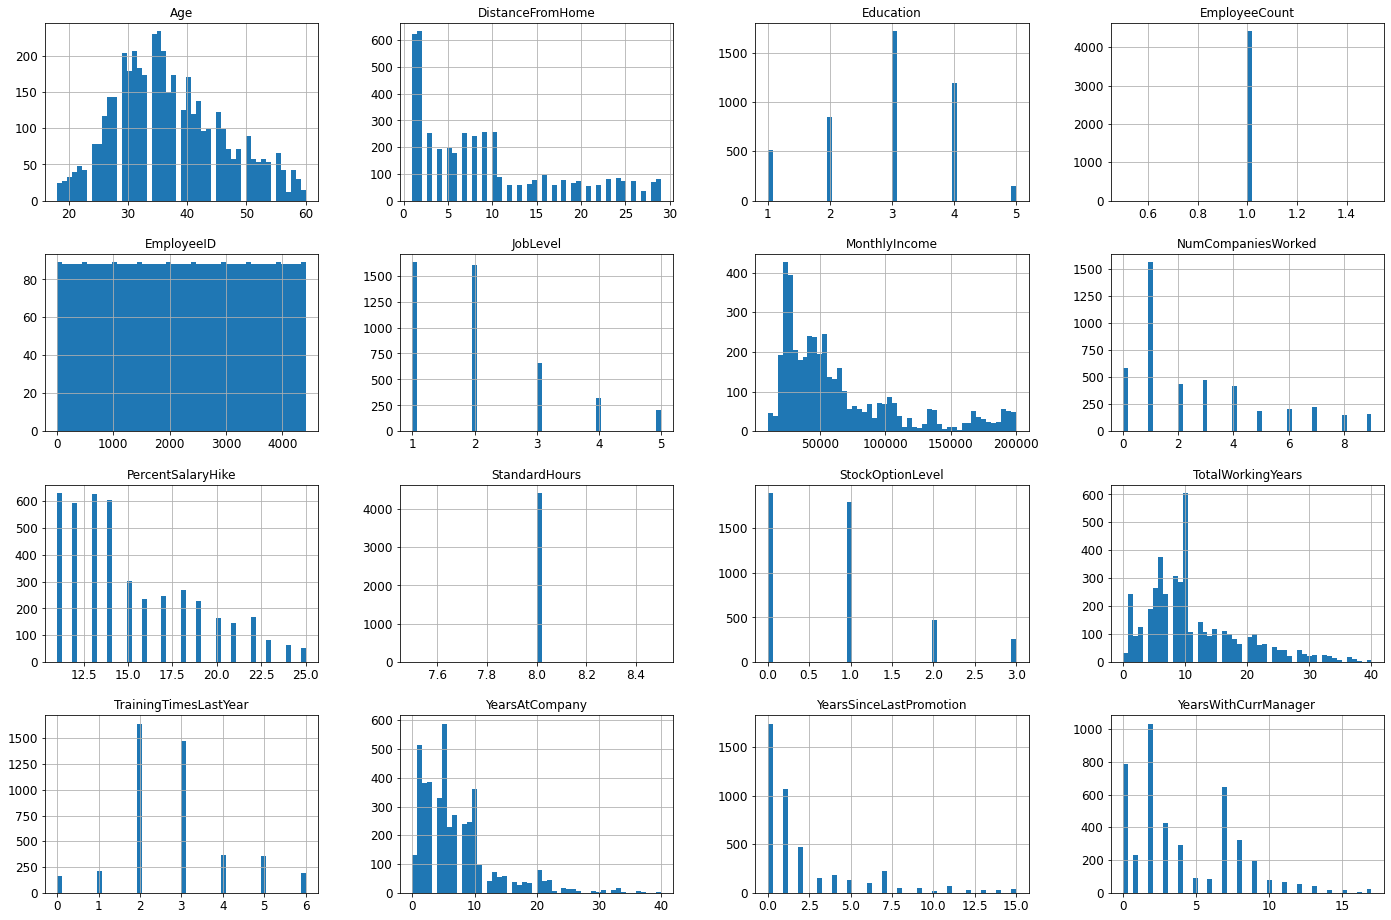

In [8]:
general_data.hist(bins=50, figsize = (24,16))

# Preparation des données:

Le prétraitement des données demande beaucoup de travail et peut être une procédure très fastidieuse. Durant cette étape nous tâcherons d'appliquer les bonnes pratiques afin de structurer et nettoyer notre jeu de données. Pour ce faire nous avons réalisé l'analyse statique pour ensuite réaliser notre pipeline.

In [9]:
#Copy of both dataframe
intime_dataCpy = intime_data.copy()
outtime_dataCpy = outtime_data.copy()
#Replace NaN by 0
intime_dataCpy = intime_dataCpy.fillna(0)
outtime_dataCpy = outtime_dataCpy.fillna(0)
#Convert the time text into time
for k in range(1,len(intime_dataCpy.columns)):
    intime_dataCpy[intime_dataCpy.columns[k]] = pd.to_datetime(intime_dataCpy[intime_dataCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')
for k in range(1,len(outtime_dataCpy.columns)):
    outtime_dataCpy[outtime_dataCpy.columns[k]] = pd.to_datetime(outtime_dataCpy[outtime_dataCpy.columns[k]], format='%Y-%m-%d %H:%M:%S')



intime_dataCpy.head(5)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,1970-01-01,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,1970-01-01 00:00:00,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,1970-01-01,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,1970-01-01,2015-01-02 10:15:44,2015-01-05 10:21:05,1970-01-01 00:00:00,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,1970-01-01 00:00:00,1970-01-01,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,1970-01-01,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,1970-01-01,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,1970-01-01,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,1970-01-01,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,1970-01-01,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,1970-01-01,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [10]:
#Subtract time
inoutTime_data = intime_data.copy()

for k in range(1,len(intime_dataCpy.columns)):
    inoutTime_data[inoutTime_data.columns[k]] = outtime_dataCpy[outtime_dataCpy.columns[k]] - intime_dataCpy[intime_dataCpy.columns[k]]

inoutTime_data.head(5)

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,2,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,3,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,4,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,5,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


In [11]:
#We search for the mean
inoutTime_dataCpy = inoutTime_data.copy()
inoutTime_dataCpy = inoutTime_dataCpy.drop("EmployeeID", axis=1)
inoutTime_dataCpy = inoutTime_dataCpy.replace('0 days', np.nan) #We put back the NaN to prevent the 0 to have an impact on the mean

inoutMeanTime_data = inoutTime_dataCpy.mean(axis=1)

meanWorkingTime = pd.DataFrame({'EmployeeID':inoutMeanTime_data.index+1,'MeanWorkingTime':inoutMeanTime_data.values})
meanWorkingTime['MeanWorkingTime']=meanWorkingTime['MeanWorkingTime']/np.timedelta64(1, 'h')
meanWorkingTime

,EmployeeID,MeanWorkingTime
0,1,7.373651
1,2,7.718969
2,3,7.013240
3,4,7.193678
4,5,8.006175
...,...,...
4405,4406,8.522277
4406,4407,6.092954
4407,4408,7.706632
4408,4409,9.492595


# Merge des données:

In [12]:
premerged_data = pd.merge(general_data, empSurvey_data)
premerged_data = pd.merge(premerged_data, manSurvey_data)
merged_data = pd.merge(premerged_data, meanWorkingTime)
merged_data_drop=merged_data
merged_data.head(10)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,6,1,0,0,3.0,4.0,2.0,3,3,7.373651
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,3,5,1,4,3.0,2.0,4.0,2,4,7.718969
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,2,5,0,3,2.0,2.0,1.0,3,3,7.013240
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,5,8,7,5,4.0,4.0,3.0,2,3,7.193678
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,2,6,0,4,4.0,1.0,3.0,3,3,8.006175
5,46,No,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,...,5,7,7,7,3.0,2.0,2.0,3,3,10.796096
6,28,Yes,Travel_Rarely,Research & Development,11,2,Medical,1,7,Male,...,2,0,0,0,1.0,3.0,1.0,3,4,6.923570
7,29,No,Travel_Rarely,Research & Development,18,3,Life Sciences,1,8,Male,...,2,0,0,0,1.0,2.0,3.0,3,4,6.725621
8,31,No,Travel_Rarely,Research & Development,1,3,Life Sciences,1,9,Male,...,2,9,7,8,2.0,4.0,3.0,3,4,7.236499
9,25,No,Non-Travel,Research & Development,7,4,Medical,1,10,Female,...,2,6,1,5,2.0,1.0,3.0,3,3,7.080088


In [13]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [14]:
merged_data.drop("EmployeeID", axis=1,inplace=True)
merged_data.drop("EmployeeCount", axis=1,inplace=True)
merged_data.drop("StandardHours",axis=1,inplace=True)
merged_data.drop("Over18",axis=1,inplace=True)


In [15]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

# Analyse des données:

Nous pouvons analyser les données obtenues pour essayer de déceler les attributs les plus pertinents par exemple ou simplement pour se mettre au courant de l'architecture du dataset sur lequel nous allons travailler.

Il est important de faire des boites à moustache pour plusieurs raisons :

Visualisation des mesures de tendance centrale : Les graphiques de boîtes à moustache présentent des mesures de tendance centrale telles que la médiane et les quartiles qui donnent une idée de la répartition des données. Cette information est importante pour comprendre la distribution des données et détecter les valeurs aberrantes ou les valeurs extrêmes.

Comparaison de plusieurs groupes : Les graphiques de boîtes permettent de comparer plusieurs groupes en même temps et de visualiser les différences entre eux. Cette comparaison peut être faite pour une seule variable ou plusieurs variables en même temps.

Détection de la symétrie et de l'asymétrie : Les graphiques de boîtes permettent de visualiser si la distribution est symétrique ou asymétrique. Une distribution asymétrique peut être un indicateur d'un biais dans les données ou d'une non-normalité.

Détection de la présence de valeurs aberrantes : Les graphiques de boîtes sont utiles pour détecter la présence de valeurs aberrantes dans les données. Les valeurs aberrantes sont des valeurs extrêmes qui peuvent fausser les résultats d'une analyse statistique et doivent être identifiées.

En somme, les graphiques de boîtes sont un outil puissant pour visualiser la distribution des données et pour identifier les tendances et les différences entre plusieurs groupes. Ils sont donc importants pour comprendre les données et pour prendre des décisions éclairées en matière d'analyse de données.


# ANOVA



L'analyse de variance (ANOVA) est une méthode statistique qui permet de comparer les moyennes d'une variable numérique entre deux groupes ou plus. L'objectif principal de l'ANOVA est de déterminer s'il existe une différence significative entre les moyennes des groupes.

Il est important de réaliser une ANOVA lorsque l'on veut comparer les moyennes de deux groupes car elle permet de :

Tester l'hypothèse nulle : L'hypothèse nulle dans une ANOVA est que toutes les moyennes des groupes sont égales. L'ANOVA permet de tester cette hypothèse en utilisant un test de significativité.

Évaluer la significativité de la différence entre les groupes : Si l'ANOVA rejette l'hypothèse nulle, cela signifie qu'il y a une différence significative entre les moyennes des groupes. L'ANOVA permet également de déterminer le degré de significativité de cette différence.

Identifier les groupes qui diffèrent significativement : Lorsqu'il y a une différence significative entre les moyennes des groupes, l'ANOVA permet d'identifier les groupes qui diffèrent significativement les uns des autres.

En résumé, l'ANOVA est une méthode importante pour comparer les moyennes de deux groupes car elle permet de tester l'hypothèse nulle, d'évaluer la significativité de la différence entre les groupes et d'identifier les groupes qui diffèrent significativement. Cette analyse est donc essentielle pour comprendre les différences entre deux groupes et pour prendre des décisions éclairées en matière d'analyse de données.


<AxesSubplot:xlabel='Attrition', ylabel='Education'>

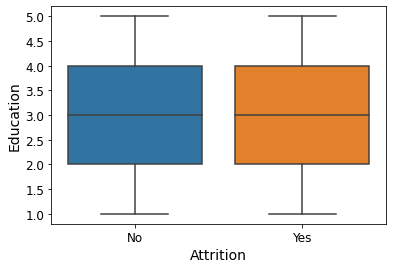

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm


sns.boxplot(x="Attrition", y="Education", data=general_data)

In [17]:
anova_variete = smf.ols('Education~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:              Education   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.007
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.316
Time:                        16:46:05   Log-Likelihood:                -6360.8
No. Observations:                4410   AIC:                         1.273e+04
Df Residuals:                    4408   BIC:                         1.274e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.9197      0.017  

In [18]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,1.055550,1.0,1.006785,0.315729
Residual,4621.507715,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='Age'>

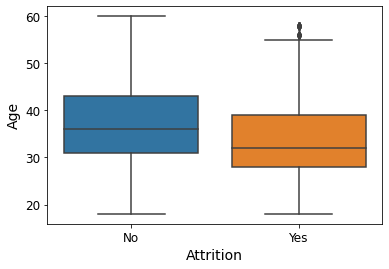

In [19]:
sns.boxplot(x="Attrition", y="Age", data=general_data)

In [20]:
anova_variete = smf.ols('Age~Attrition', data=general_data).fit()
print(anova_variete.summary())


                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     114.6
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           2.00e-26
Time:                        16:46:05   Log-Likelihood:                -15955.
No. Observations:                4410   AIC:                         3.191e+04
Df Residuals:                    4408   BIC:                         3.193e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           37.5612      0.148  

In [21]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,9322.000234,1.0,114.631682,1.996802e-26
Residual,358464.399766,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='PercentSalaryHike'>

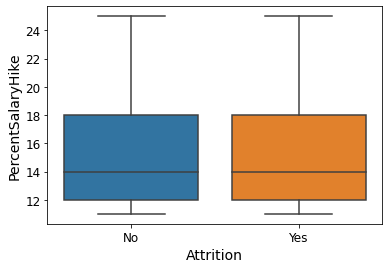

In [22]:
sns.boxplot(x="Attrition", y="PercentSalaryHike", data=general_data)

In [23]:
anova_variete = smf.ols('PercentSalaryHike~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:      PercentSalaryHike   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.670
Date:                Thu, 16 Mar 2023   Prob (F-statistic):             0.0307
Time:                        16:46:05   Log-Likelihood:                -11975.
No. Observations:                4410   AIC:                         2.395e+04
Df Residuals:                    4408   BIC:                         2.397e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           15.1573      0.060  

In [24]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,62.478105,1.0,4.670237,0.030743
Residual,58969.921895,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='StockOptionLevel'>

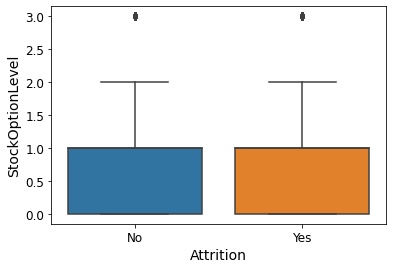

In [25]:
sns.boxplot(x="Attrition", y="StockOptionLevel", data=general_data)

In [26]:
anova_variete = smf.ols('StockOptionLevel~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:       StockOptionLevel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2062
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.650
Time:                        16:46:06   Log-Likelihood:                -5550.0
No. Observations:                4410   AIC:                         1.110e+04
Df Residuals:                    4408   BIC:                         1.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.7964      0.014  

In [27]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,0.149647,1.0,0.206171,0.649807
Residual,3199.485047,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='TrainingTimesLastYear'>

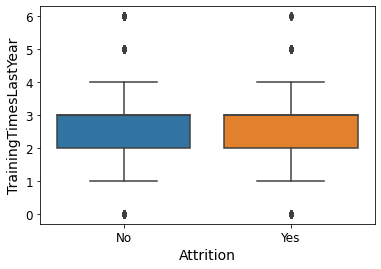

In [28]:
sns.boxplot(x="Attrition", y="TrainingTimesLastYear", data=general_data)

In [29]:
anova_variete = smf.ols('TrainingTimesLastYear~Attrition', data=general_data).fit()
print(anova_variete.summary())

                              OLS Regression Results                             
Dep. Variable:     TrainingTimesLastYear   R-squared:                       0.002
Model:                               OLS   Adj. R-squared:                  0.002
Method:                    Least Squares   F-statistic:                     10.80
Date:                   Thu, 16 Mar 2023   Prob (F-statistic):            0.00102
Time:                           16:46:06   Log-Likelihood:                -7371.1
No. Observations:                   4410   AIC:                         1.475e+04
Df Residuals:                       4408   BIC:                         1.476e+04
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept 

In [30]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,17.898745,1.0,10.796808,0.001025
Residual,7307.499215,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

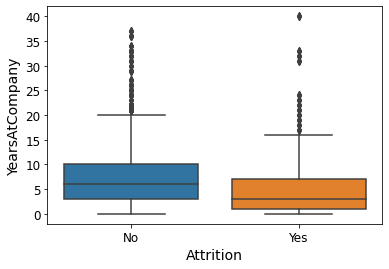

In [31]:
sns.boxplot(x="Attrition", y="YearsAtCompany", data=general_data)

In [32]:
anova_variete = smf.ols('YearsAtCompany~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:         YearsAtCompany   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     81.08
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           3.16e-19
Time:                        16:46:06   Log-Likelihood:                -14210.
No. Observations:                4410   AIC:                         2.842e+04
Df Residuals:                    4408   BIC:                         2.844e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            7.3690      0.100  

In [33]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,2987.581142,1.0,81.078445,3.163883e-19
Residual,162426.124981,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

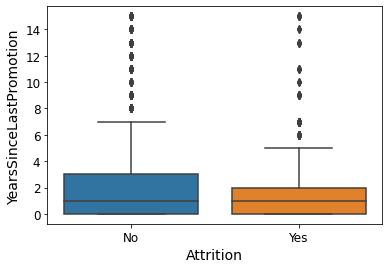

In [34]:
sns.boxplot(x="Attrition", y="YearsSinceLastPromotion", data=general_data)

In [35]:
anova_variete = smf.ols('YearsSinceLastPromotion~Attrition', data=general_data).fit()
print(anova_variete.summary())

                               OLS Regression Results                              
Dep. Variable:     YearsSinceLastPromotion   R-squared:                       0.001
Model:                                 OLS   Adj. R-squared:                  0.001
Method:                      Least Squares   F-statistic:                     4.811
Date:                     Thu, 16 Mar 2023   Prob (F-statistic):             0.0283
Time:                             16:46:07   Log-Likelihood:                -11414.
No. Observations:                     4410   AIC:                         2.283e+04
Df Residuals:                         4408   BIC:                         2.284e+04
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [36]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,49.892128,1.0,4.811021,0.02833
Residual,45712.646648,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='YearsWithCurrManager'>

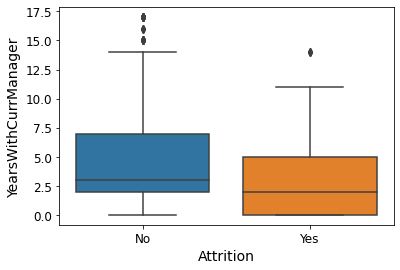

In [37]:
sns.boxplot(x="Attrition", y="YearsWithCurrManager", data=general_data)

In [38]:
anova_variete = smf.ols('YearsWithCurrManager~Attrition', data=general_data).fit()
print(anova_variete.summary())

                             OLS Regression Results                             
Dep. Variable:     YearsWithCurrManager   R-squared:                       0.024
Model:                              OLS   Adj. R-squared:                  0.024
Method:                   Least Squares   F-statistic:                     110.2
Date:                  Thu, 16 Mar 2023   Prob (F-statistic):           1.73e-25
Time:                          16:46:07   Log-Likelihood:                -11811.
No. Observations:                  4410   AIC:                         2.363e+04
Df Residuals:                      4408   BIC:                         2.364e+04
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           

In [39]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,1368.939116,1.0,110.236968,1.733932e-25
Residual,54739.201700,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='MonthlyIncome'>

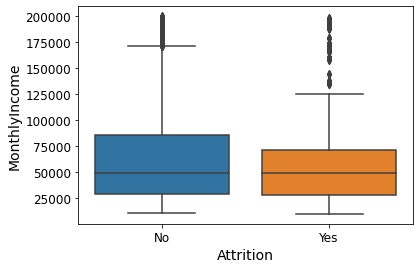

In [40]:
sns.boxplot(x="Attrition", y="MonthlyIncome", data=general_data)

In [41]:
anova_variete = smf.ols('MonthlyIncome~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:          MonthlyIncome   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     4.289
Date:                Thu, 16 Mar 2023   Prob (F-statistic):             0.0384
Time:                        16:46:08   Log-Likelihood:                -53704.
No. Observations:                4410   AIC:                         1.074e+05
Df Residuals:                    4408   BIC:                         1.074e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         6.567e+04    773.624  

In [42]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,9.494162e+09,1.0,4.28857,0.038427
Residual,9.758558e+12,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='JobLevel'>

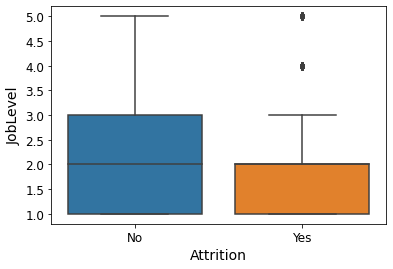

In [43]:
sns.boxplot(x="Attrition", y="JobLevel", data=general_data)

In [44]:
anova_variete = smf.ols('JobLevel~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:               JobLevel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4668
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.495
Time:                        16:46:08   Log-Likelihood:                -6703.8
No. Observations:                4410   AIC:                         1.341e+04
Df Residuals:                    4408   BIC:                         1.342e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.0689      0.018  

In [45]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,0.571739,1.0,0.466761,0.494517
Residual,5399.395608,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='DistanceFromHome'>

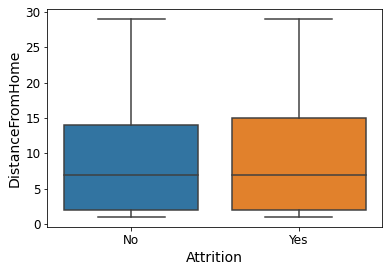

In [46]:
sns.boxplot(x="Attrition", y="DistanceFromHome", data=general_data)

In [47]:
anova_variete = smf.ols('DistanceFromHome~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:       DistanceFromHome   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4174
Date:                Thu, 16 Mar 2023   Prob (F-statistic):              0.518
Time:                        16:46:09   Log-Likelihood:                -15485.
No. Observations:                4410   AIC:                         3.097e+04
Df Residuals:                    4408   BIC:                         3.099e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            9.2271      0.133  

In [48]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,27.421243,1.0,0.41737,0.518286
Residual,289606.131818,4408.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='NumCompaniesWorked'>

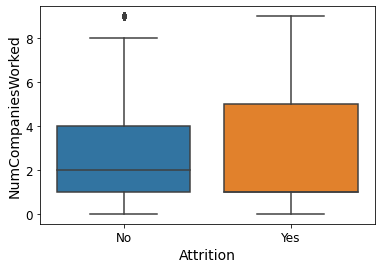

In [49]:
sns.boxplot(x="Attrition", y="NumCompaniesWorked", data=general_data)

In [50]:
anova_variete = smf.ols('NumCompaniesWorked~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:     NumCompaniesWorked   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.884
Date:                Thu, 16 Mar 2023   Prob (F-statistic):            0.00501
Time:                        16:46:09   Log-Likelihood:                -10248.
No. Observations:                4391   AIC:                         2.050e+04
Df Residuals:                    4389   BIC:                         2.051e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            2.6485      0.041  

In [51]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,49.155376,1.0,7.884213,0.005009
Residual,27363.917273,4389.0,NaN,NaN


<AxesSubplot:xlabel='Attrition', ylabel='TotalWorkingYears'>

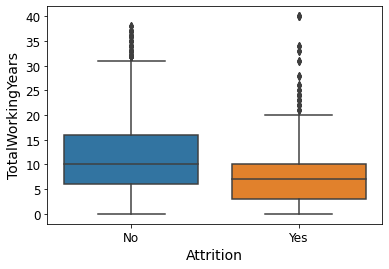

In [52]:
sns.boxplot(x="Attrition", y="TotalWorkingYears", data=general_data)

In [53]:
anova_variete = smf.ols('TotalWorkingYears~Attrition', data=general_data).fit()
print(anova_variete.summary())

                            OLS Regression Results                            
Dep. Variable:      TotalWorkingYears   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     131.5
Date:                Thu, 16 Mar 2023   Prob (F-statistic):           5.24e-30
Time:                        16:46:09   Log-Likelihood:                -15210.
No. Observations:                4401   AIC:                         3.042e+04
Df Residuals:                    4399   BIC:                         3.044e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           11.8608      0.126  

In [54]:
sm.stats.anova_lm(anova_variete, typ=2)

,sum_sq,df,F,PR(>F)
Attrition,7731.884763,1.0,131.451933,5.241247e-30
Residual,258745.233619,4399.0,NaN,NaN


# Khi-deux pour les données qualitatives

Le test du Chi-carré (ou Khi-deux) est une méthode statistique utilisée pour déterminer si la distribution d'une variable qualitative dans un échantillon diffère significativement de la distribution attendue. C'est une méthode importante pour l'analyse de données qualitatives car elle permet de tester si les différences observées sont significatives ou simplement dues au hasard.

Voici quelques raisons pour lesquelles il est important d'utiliser le test du Chi-carré pour les données qualitatives :

Tester l'hypothèse nulle : Le test du Chi-carré permet de tester l'hypothèse nulle selon laquelle il n'y a pas de différence significative entre la distribution de la variable qualitative dans l'échantillon et la distribution attendue. Si l'hypothèse nulle est rejetée, cela suggère qu'il existe une relation entre la variable qualitative et la distribution de l'échantillon.

Évaluer la force de la relation : Le test du Chi-carré permet également d'évaluer la force de la relation entre la variable qualitative et la distribution de l'échantillon. En calculant la statistique du Chi-carré, on peut déterminer si la relation est forte ou faible.

Identifier les différences significatives : En utilisant le test du Chi-carré, on peut identifier les différences significatives entre les groupes dans la distribution de la variable qualitative. Cela peut aider à comprendre les différences entre les groupes et à prendre des décisions éclairées.

En résumé, le test du Chi-carré est important pour l'analyse de données qualitatives car il permet de tester l'hypothèse nulle, d'évaluer la force de la relation entre la variable qualitative et la distribution de l'échantillon, et d'identifier les différences significatives entre les groupes. Cette analyse est essentielle pour comprendre les différences entre les groupes et pour prendre des décisions éclairées en matière d'analyse de données qualitatives.

On choisit de garder ou non une variable selon la valeur de P si elle est supérieure ou égale a 5% on ne la garde pas car elle n’influe pas sur l’attrition si non on la garde.




 



In [55]:
# Table de contigence

cont_table =pd.crosstab(general_data['Attrition'], general_data['BusinessTravel'])
cont_table

BusinessTravel,Non-Travel,Travel_Frequently,Travel_Rarely
Attrition,,,
No,414,624,2661
Yes,36,207,468


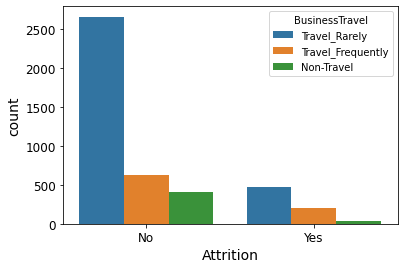

In [56]:
sns.countplot(x='Attrition', hue='BusinessTravel', data=general_data);

In [57]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(72.54724105696552,
 1.764276972983189e-16,
 2,
 array([[ 377.44897959,  697.02244898, 2624.52857143],
        [  72.55102041,  133.97755102,  504.47142857]]))

In [58]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['Department'])
cont_table

Department,Human Resources,Research & Development,Sales
Attrition,,,
No,132,2430,1137
Yes,57,453,201


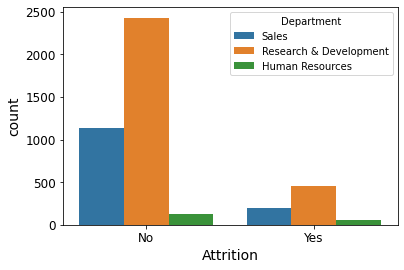

In [59]:
sns.countplot(x='Attrition', hue='Department', data=general_data);

In [60]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(29.090274924488266,
 4.820888218170406e-07,
 2,
 array([[ 158.52857143, 2418.18979592, 1122.28163265],
        [  30.47142857,  464.81020408,  215.71836735]]))

In [61]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['EducationField'])
cont_table

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree
Attrition,,,,,,
No,48,1515,402,1167,216,351
Yes,33,303,75,225,30,45


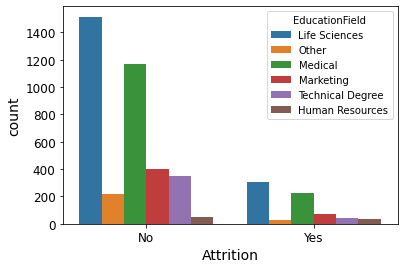

In [62]:
sns.countplot(x='Attrition', hue='EducationField', data=general_data);

In [63]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(46.194921001730584,
 8.288917469574179e-09,
 5,
 array([[  67.94081633, 1524.89387755,  400.09591837, 1167.5755102 ,
          206.33877551,  332.15510204],
        [  13.05918367,  293.10612245,   76.90408163,  224.4244898 ,
           39.66122449,   63.84489796]]))

In [64]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['Gender'])
cont_table

Gender,Female,Male
Attrition,,
No,1494,2205
Yes,270,441


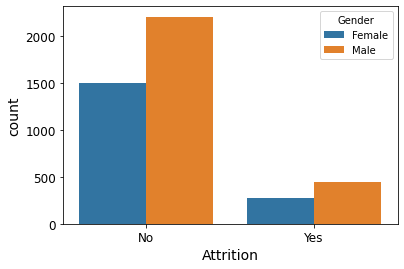

In [65]:
sns.countplot(x='Attrition', hue='Gender', data=general_data);

In [66]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(1.349904410246582,
 0.24529482862926827,
 1,
 array([[1479.6, 2219.4],
        [ 284.4,  426.6]]))

In [67]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['JobRole'])
cont_table

JobRole,Healthcare Representative,Human Resources,Laboratory Technician,Manager,Manufacturing Director,Research Director,Research Scientist,Sales Executive,Sales Representative
Attrition,,,,,,,,,
No,336,135,651,264,387,183,717,813,213
Yes,57,21,126,42,48,57,159,165,36


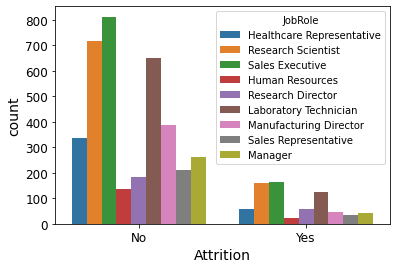

In [68]:
sns.countplot(x='Attrition', hue='JobRole', data=general_data);

In [69]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(25.116313674604072,
 0.001485544744815264,
 8,
 array([[329.63877551, 130.84897959, 651.72857143, 256.66530612,
         364.86734694, 201.30612245, 734.76734694, 820.32244898,
         208.85510204],
        [ 63.36122449,  25.15102041, 125.27142857,  49.33469388,
          70.13265306,  38.69387755, 141.23265306, 157.67755102,
          40.14489796]]))

In [70]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['MaritalStatus'])
cont_table

MaritalStatus,Divorced,Married,Single
Attrition,,,
No,882,1767,1050
Yes,99,252,360


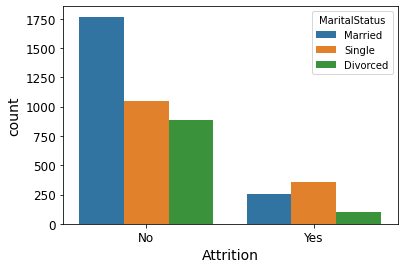

In [71]:
sns.countplot(x='Attrition', hue='MaritalStatus', data=general_data);

In [72]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(138.49102962254608,
 8.45385940605786e-31,
 2,
 array([[ 822.83877551, 1693.4877551 , 1182.67346939],
        [ 158.16122449,  325.5122449 ,  227.32653061]]))

In [73]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['Over18'])
cont_table

Over18,Y
Attrition,
No,3699
Yes,711


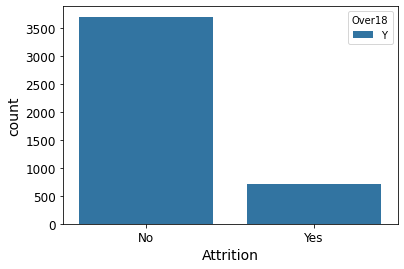

In [74]:
sns.countplot(x='Attrition', hue='Over18', data=general_data);

In [75]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(0.0,
 1.0,
 0,
 array([[3699.],
        [ 711.]]))

In [76]:
cont_table =pd.crosstab(general_data['Attrition'], general_data['DistanceFromHome'])
cont_table

DistanceFromHome,1,2,3,4,5,6,7,8,9,10,...,20,21,22,23,24,25,26,27,28,29
Attrition,,,,,,,,,,,,,,,,,,,,,
No,528,519,222,159,165,156,204,207,219,198,...,66,48,48,69,75,69,72,27,57,69
Yes,96,114,30,33,30,21,48,33,36,60,...,9,6,9,12,9,6,3,9,12,12


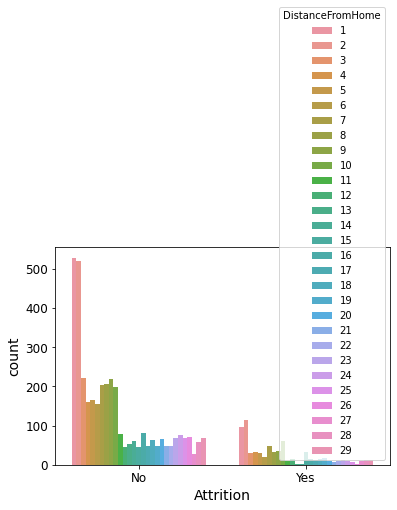

In [77]:
sns.countplot(x='Attrition', hue='DistanceFromHome', data=general_data);

In [78]:
#Test du Khi-deux
import scipy.stats as stats 

stats.chi2_contingency(cont_table, correction = True)

(102.3516705172535,
 2.098176387479194e-10,
 28,
 array([[523.39591837, 530.94489796, 211.37142857, 161.04489796,
         163.56122449, 148.46326531, 211.37142857, 201.30612245,
         213.8877551 , 216.40408163,  72.97346939,  50.32653061,
          47.81020408,  52.84285714,  65.4244898 ,  80.52244898,
          50.32653061,  65.4244898 ,  55.35918367,  62.90816327,
          45.29387755,  47.81020408,  67.94081633,  70.45714286,
          62.90816327,  62.90816327,  30.19591837,  57.8755102 ,
          67.94081633],
        [100.60408163, 102.05510204,  40.62857143,  30.95510204,
          31.43877551,  28.53673469,  40.62857143,  38.69387755,
          41.1122449 ,  41.59591837,  14.02653061,   9.67346939,
           9.18979592,  10.15714286,  12.5755102 ,  15.47755102,
           9.67346939,  12.5755102 ,  10.64081633,  12.09183673,
           8.70612245,   9.18979592,  13.05918367,  13.54285714,
          12.09183673,  12.09183673,   5.80408163,  11.1244898 ,
          13.0591

In [79]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   int64  
 14  StockOptionLevel        

# Matrice de corrélation:

Une matrice de corrélation est utilisée pour évaluer la dépendence entre plusieurs variables en même temps. Le résultat est une table contenant les coefficients de corrélation entre chaque variable et les autres.

Il existe différentes méthodes de tests de corrélation : Le test de corrélation de Pearson, la corrélation de Kendall et celle de Spearman qui sont des tests basés sur le rang, dans notre cas nous avons utiliser seaborn afin de schématiser la matrice comme le montre la figure

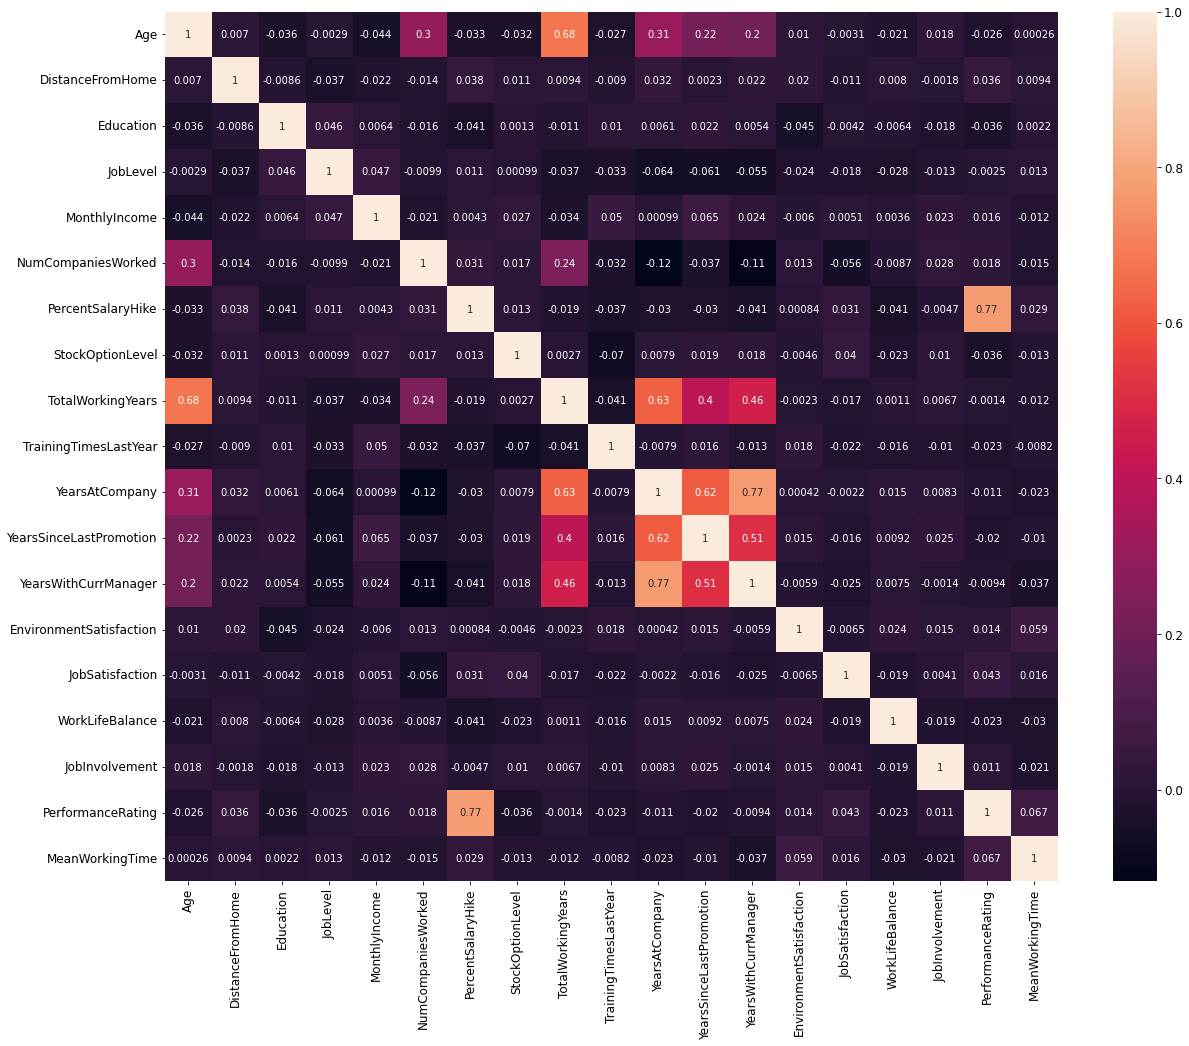

In [80]:
import seaborn as sns
corrMatrix = merged_data.corr(method='pearson')


plt.figure(figsize=(20, 16))
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Préparation de la pipeline:

# Ordinal Encodeur:

L’encodage catégorique est une technique permettant d’encoder des données catégoriques. Sachant que les données catégorielles sont les ensembles de variables qui contiennent des variables d’étiquette au lieu de valeurs numériques. De nombreux algorithmes d’apprentissage automatique sont incapables de traiter les variables catégorielles. Il est donc important de coder les données sous une forme appropriée afin de pouvoir prétraiter ces variables. dans le but de ajuster et évaluer notre modèle, nous avons coder les données catégorielles et convertir toutes les variables d’entrée et de sortie en valeurs numériques. Ainsi, le modèle sera en mesure de comprendre et d’extraire les informations générant le résultat souhaité. Un ensemble différent de données varie en fonction du nombre de valeurs possibles.

In [81]:
from sklearn.preprocessing import OrdinalEncoder , LabelEncoder

label_encoder = LabelEncoder()
merged_data["Attrition"] = label_encoder.fit_transform(merged_data["Attrition"])

# Sélectionner toutes les colonnes sauf EmployeeID et Attrition
cat_cols = [col for col in merged_data.columns if col not in [ "Attrition"]]
dataset_quant = merged_data[cat_cols]

# Encoder les variables catégorielles avec l'encodage ordinal
ordinal_encoder = OrdinalEncoder()
dataset_encoded = ordinal_encoder.fit_transform(dataset_quant)
dataset_encoded = pd.DataFrame(dataset_encoded, columns=cat_cols)



dataset_encoded["Attrition"] = merged_data["Attrition"]

In [82]:
merged_data.update(dataset_encoded)
convert_dict = {"Attrition": float, "BusinessTravel": float, "Department": float, "EducationField": float, 
                "JobRole": float, "MaritalStatus": float, "Gender": float, }
merged_data = merged_data.astype(convert_dict)
merged_data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,33.0,0.0,2.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,...,6.0,1.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,2113.0
1,13.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,0.0,6.0,...,3.0,5.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,2692.0
2,14.0,0.0,1.0,1.0,16.0,3.0,4.0,1.0,3.0,7.0,...,2.0,5.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,1614.0
3,20.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,...,5.0,8.0,7.0,5.0,3.0,3.0,2.0,1.0,0.0,1871.0
4,14.0,0.0,2.0,1.0,9.0,0.0,3.0,1.0,0.0,7.0,...,2.0,6.0,0.0,4.0,3.0,0.0,2.0,2.0,0.0,3108.0


In [83]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   Attrition                4410 non-null   float64
 2   BusinessTravel           4410 non-null   float64
 3   Department               4410 non-null   float64
 4   DistanceFromHome         4410 non-null   float64
 5   Education                4410 non-null   float64
 6   EducationField           4410 non-null   float64
 7   Gender                   4410 non-null   float64
 8   JobLevel                 4410 non-null   float64
 9   JobRole                  4410 non-null   float64
 10  MaritalStatus            4410 non-null   float64
 11  MonthlyIncome            4410 non-null   float64
 12  NumCompaniesWorked       4391 non-null   float64
 13  PercentSalaryHike        4410 non-null   float64
 14  StockOptionLevel        

# KNN:

La méthode des K plus proches voisins (KNN) a pour but de classifier des points cibles (classe méconnue) en fonction de leurs distances par rapport à des points constituant un échantillon d’apprentissage (c’est-à-dire dont la classe est connue a priori).

KNN est une approche de classification supervisée intuitive, souvent utilisée dans le cadre du machine learning. Il s’agit d’une généralisation de la méthode du voisin le plus proche (NN).

In [84]:
from sklearn.impute import KNNImputer
knn = merged_data[['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance']]

imputer = KNNImputer(n_neighbors=10)
imputer.fit_transform(knn)
complete_rows = pd.DataFrame(imputer.fit_transform(knn), columns=knn.columns.values)
merged_data.update(complete_rows)
merged_data.update(dataset_encoded)
merged_data.head(50)


,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating,MeanWorkingTime
0,33.0,0.0,2.0,2.0,5.0,1.0,1.0,0.0,0.0,0.0,...,6.0,1.0,0.0,0.0,2.0,3.0,1.0,2.0,0.0,2113.0
1,13.0,1.0,1.0,1.0,9.0,0.0,1.0,0.0,0.0,6.0,...,3.0,5.0,1.0,4.0,2.0,1.0,3.0,1.0,1.0,2692.0
2,14.0,0.0,1.0,1.0,16.0,3.0,4.0,1.0,3.0,7.0,...,2.0,5.0,0.0,3.0,1.0,1.0,0.0,2.0,0.0,1614.0
3,20.0,0.0,0.0,1.0,1.0,4.0,1.0,1.0,2.0,1.0,...,5.0,8.0,7.0,5.0,3.0,3.0,2.0,1.0,0.0,1871.0
4,14.0,0.0,2.0,1.0,9.0,0.0,3.0,1.0,0.0,7.0,...,2.0,6.0,0.0,4.0,3.0,0.0,2.0,2.0,0.0,3108.0
5,28.0,0.0,2.0,1.0,7.0,2.0,1.0,0.0,3.0,5.0,...,5.0,7.0,7.0,7.0,2.0,1.0,1.0,2.0,0.0,4311.0
6,10.0,1.0,2.0,1.0,10.0,1.0,3.0,1.0,1.0,7.0,...,2.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,1.0,1523.0
7,11.0,0.0,2.0,1.0,17.0,2.0,1.0,1.0,1.0,7.0,...,2.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,1.0,1220.0
8,13.0,0.0,2.0,1.0,0.0,2.0,1.0,1.0,2.0,2.0,...,2.0,9.0,7.0,8.0,1.0,3.0,2.0,2.0,1.0,1957.0
9,7.0,0.0,0.0,1.0,6.0,3.0,3.0,0.0,3.0,2.0,...,2.0,6.0,1.0,5.0,1.0,0.0,2.0,2.0,0.0,1685.0


In [85]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   float64
 1   Attrition                4410 non-null   float64
 2   BusinessTravel           4410 non-null   float64
 3   Department               4410 non-null   float64
 4   DistanceFromHome         4410 non-null   float64
 5   Education                4410 non-null   float64
 6   EducationField           4410 non-null   float64
 7   Gender                   4410 non-null   float64
 8   JobLevel                 4410 non-null   float64
 9   JobRole                  4410 non-null   float64
 10  MaritalStatus            4410 non-null   float64
 11  MonthlyIncome            4410 non-null   float64
 12  NumCompaniesWorked       4410 non-null   float64
 13  PercentSalaryHike        4410 non-null   float64
 14  StockOptionLevel        

In [86]:
dataset_complet=merged_data.copy()


# Split 

Le découpage du jeu de données dans un projet de Machine Learning est une étape très importante qu’il ne faut pas négliger faute de quoi vous risquer de sur évaluer votre modèle (over-fitting) ou tout simplement le contraire (under fitting). En effet par nature un modèle va coller (mais pas trop) à ses données d’entrainement.

Cett étape est donc une étape préalable mais aussi une étape d’optimisation qu’il ne faut pas laisser de coté. Nous allons voir dans cette étape comment gérer ses jeux de données avec Python et sklearn

In [112]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=RANDOM_SEED)

for train_index, test_index in split.split(merged_data, merged_data["Attrition"]):
    strat_train_set = merged_data.loc[train_index]
    strat_test_set = merged_data.loc[test_index]

In [113]:
strat_train_set.shape

(3528, 26)

In [114]:
strat_test_set.shape

(882, 26)

# Modéle

Maintenant que nous avons divisé nos données en ensemble d'entraînement et de test, il est temps de construire un modèle d'apprentissage automatique (cas supervisé)
Nous allons l'entraîner (trouver les modèles) sur l'ensemble d'entraînement.
Et nous allons le tester (utiliser les modèles) sur l'ensemble de test.
Nous allons essayer sur différents modèles d'apprentissage automatique différents : 
Régression logistique
Arbre de décision,
Random forest,
Perceptron,
Support vector classifier,
SGD,


In [170]:
Y_train = strat_train_set["Attrition"].copy()
X_train = strat_train_set.drop("Attrition", axis=1)
Y_test = strat_test_set["Attrition"].copy()
X_test = strat_test_set.drop("Attrition", axis=1)

# Random forest :

Le modèle d'apprentissage automatique de Random Forest est un algorithme de classification et de régression qui combine plusieurs arbres de décision pour améliorer les performances de prédiction. Pour notre problématique de turn-over, l'algorithme de Random Forest peut être utilisé pour identifier les facteurs ayant le plus d'influence sur le taux de turn-over.

Le principe de Random Forest consiste à créer un grand nombre d'arbres de décision, chacun étant formé sur un sous-échantillon aléatoire des données d'entrainement et sur un sous-ensemble aléatoire des variables d'entrée. Ensuite, pour faire une prédiction, chaque arbre de décision vote pour une classe ou une valeur de sortie, et la prédiction finale est la classe ou la valeur ayant reçu le plus de votes.

L'algorithme de Random Forest présente plusieurs avantages, notamment sa capacité à gérer efficacement les données avec un grand nombre de variables et à identifier les interactions complexes entre les variables d'entrée. Il peut également être utilisé pour évaluer l'importance des variables dans la prédiction du taux de turn-over, ce qui nous permet de nous concentrer sur les facteurs les plus importants pour réduire le turn-over.

Cependant, il est important de noter que l'algorithme de Random Forest est plus difficile à interpréter que d'autres modèles, tels que la régression logistique


In [117]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Initialiser le modèle de Random Forest avec les hyperparamètres souhaités
rf = RandomForestClassifier(random_state=42, n_estimators=15)

# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
test_predictions = rf.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)
auc = roc_auc_score(Y_test, test_predictions)

# Calculer l'accuracy sur les données de test
test_accuracy = rf.score(X_test, Y_test)

print("Classification report on test data:")
print(classification_report(Y_test, test_predictions))

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)
print("AUC:", auc)



Classification report on test data:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00       740
         1.0       1.00      0.96      0.98       142

    accuracy                           0.99       882
   macro avg       1.00      0.98      0.99       882
weighted avg       0.99      0.99      0.99       882

Accuracy on test data: 0.9931972789115646
F1-score on test data: 0.9784172661870503
Precision on test data: 1.0
Recall on test data: 0.9577464788732394
AUC: 0.9788732394366197


# Randomized Search:

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint


In [119]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Définir les hyperparamètres et leurs distributions pour la recherche aléatoire
param_dist = {'n_estimators': [50, 100, 200, 400, 800],
              'max_features': ['sqrt', 'log2', None],
              'max_depth': [5, 10, 20, 30, None],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'bootstrap': [True, False]}

# Créer un objet de RandomForestClassifier
rf = RandomForestClassifier()

# Utiliser RandomizedSearchCV pour effectuer la recherche aléatoire des hyperparamètres
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=50, cv=5, n_jobs=-1, random_state=42)

# Adapter le modèle aux données d'entraînement
random_search.fit(X_train, Y_train)

# Afficher les meilleurs hyperparamètres et le meilleur score
print('Meilleurs hyperparamètres:', random_search.best_params_)
print('Meilleur score:', random_search.best_score_)

Meilleurs hyperparamètres: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Meilleur score: 0.9812954814859461


# Random forest avec hyperparamétres:

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Initialiser le modèle de Random Forest avec les hyperparamètres souhaités
rf = RandomForestClassifier(n_estimators=100, min_samples_split=5, min_samples_leaf=1, 
                             max_features='sqrt', max_depth=None, bootstrap=False, random_state=42)

# Entraîner le modèle sur les données d'entraînement
rf.fit(X_train, Y_train)

# Faire des prédictions sur les données de test
test_predictions = rf.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)
auc = roc_auc_score(Y_test, test_predictions)

# Calculer l'accuracy sur les données de test
test_accuracy = rf.score(X_test, Y_test)

print("Classification report on test data:")
print(classification_report(Y_test, test_predictions))

print("Accuracy on test data:", test_accuracy)
print("F1-score on test data:", test_f1)
print("Precision on test data:", test_precision)
print("Recall on test data:", test_recall)
print("AUC:", auc)



Classification report on test data:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       740
         1.0       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882

Accuracy on test data: 0.9965986394557823
F1-score on test data: 0.9893238434163701
Precision on test data: 1.0
Recall on test data: 0.9788732394366197
AUC: 0.9894366197183099


# Regression logistique

La régression logistique est un modèle d'apprentissage automatique utilisé pour prédire une variable binaire en fonction de variables explicatives. Elle est largement utilisée pour les problèmes de classification binaire, où l'objectif est de prédire la probabilité d'appartenance à une classe particulière (par exemple, l'attrition ou la non-attrition) en fonction des caractéristiques individuelles de chaque observation.

Le modèle de régression logistique utilise une fonction logistique pour modéliser la relation entre les variables explicatives et la variable de réponse binaire. La fonction logistique est une courbe en forme de S qui peut prendre une valeur comprise entre 0 et 1, ce qui la rend particulièrement utile pour la modélisation de variables binaires.

Le modèle de régression logistique calcule les coefficients de régression pour chaque variable explicative qui sont utilisés pour calculer la probabilité d'appartenance à la classe positive (par exemple, attrition). Les coefficients sont choisis de manière à minimiser l'erreur de prédiction en ajustant la courbe de la fonction logistique aux données d'apprentissage.

Une fois que le modèle est ajusté, il peut être utilisé pour prédire la probabilité d'appartenance à la classe positive pour de nouvelles observations en utilisant les mêmes coefficients de régression. La décision de classification est prise en comparant cette probabilité à un seuil de décision prédéfini. Si la probabilité est supérieure au seuil, la prédiction est que l'observation appartient à la classe positive, sinon, elle appartient à la classe négative.


In [121]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.datasets import load_iris




# Créer un modèle de régression logistique
#lr = LogisticRegression()
lr = LogisticRegression(C= 70.72114131472235, max_iter= 5000, penalty= 'l2', solver= 'lbfgs')# Diviser les données en ensemble d'entraînement et ensemble de test
# Entraîner le modèle sur l'ensemble d'entraînement
lr.fit(X_train, Y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = lr.predict(X_test)

# Évaluer les performances du modèle en utilisant plusieurs mesures de performance
accuracy = accuracy_score(Y_test, y_pred)
precision_lr = precision_score(Y_test, y_pred)
recall_lr = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 score:", f1)
print("AUC", auc)

x_stat = sm.add_constant(X_train)
model_logit = sm.Logit(Y_train, x_stat)
result = model_logit.fit()
result.summary()

Accuracy: 0.8492063492063492
Precision: 0.6
Recall: 0.19014084507042253
F1 score: 0.2887700534759358
AUC 0.5829082603730491
Optimization terminated successfully.
         Current function value: 0.354279
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3528
Model:                          Logit   Df Residuals:                     3502
Method:                           MLE   Df Model:                           25
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.1981
Time:                        17:02:14   Log-Likelihood:                -1249.9
converged:                       True   LL-Null:                       -1558.6
Covariance Type:            nonrobust   LLR p-value:                2.691e-114
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.1207      0.436      0.277      0.782      -0.734       0.976
Age                        -0.0364      0.008     -4.402      0.000      -0.053      -0.020
BusinessTravel             -0.0651      0.077     -0.845      0.398      -0.216       0.086
Department                 -0.2433      0.097     -2.520      0.012      -0.433      -0.054
DistanceFromHome           -0.0022      0.006     -0.341      0.733      -0.015       0.010
Education                  -0.0284      0.051     -0.562      0.574      -0.128       0.071
EducationField             -0.0886      0.039     -2.289      0.022      -0.164      -0.013
Gender                      0.1023      0.107      0.959      0.337      -0.107       0.311
JobLevel                   -0.0764      0.048     -1.603      0.109      -0.170       0.017
JobRole                     0.0384      0.021      1.805      0.071      -0.003       0.080
MaritalStatus               0.6549      0.075      8.705      0.000       0.507       0.802
MonthlyIncome           -6.087e-05      0.000     -0.459      0.646      -0.000       0.000
NumCompaniesWorked          0.1243      0.022      5.671      0.000       0.081       0.167
PercentSalaryHike          -0.0046      0.022     -0.208      0.835      -0.048       0.039
StockOptionLevel           -0.0893      0.062     -1.451      0.147      -0.210       0.031
TotalWorkingYears          -0.0614      0.014     -4.374      0.000      -0.089      -0.034
TrainingTimesLastYear      -0.1516      0.041     -3.735      0.000      -0.231      -0.072
YearsAtCompany              0.0018      0.022      0.082      0.935      -0.042       0.045
YearsSinceLastPromotion     0.1519      0.025      6.194      0.000       0.104       0.200
YearsWithCurrManager       -0.1528      0.027     -5.588      0.000      -0.206      -0.099
EnvironmentSatisfaction    -0.3274      0.047     -6.942      0.000      -0.420      -0.235
JobSatisfaction            -0.3519      0.047     -7.562      0.000      -0.443      -0.261
WorkLifeBalance            -0.3342      0.072     -4.671      0.000      -0.474      -0.194
JobInvolvement              0.0067      0.072      0.093      0.926      -0.135       0.148
PerformanceRating          -0.0325      0.222     -0.147      0.883      -0.467       0.402
MeanWorkingTime             0.0005   4.35e-05     11.718      0.000       0.000       0.001
===========================================================================================
"""

In [122]:
X_train_dropped = X_train.copy()

X_train_dropped.drop("BusinessTravel", axis=1, inplace=True)
X_train_dropped.drop("DistanceFromHome", axis=1, inplace=True)
X_train_dropped.drop("Education", axis=1, inplace=True)
X_train_dropped.drop("Gender", axis=1, inplace=True)
X_train_dropped.drop("JobLevel", axis=1, inplace=True)
X_train_dropped.drop("JobRole", axis=1, inplace=True)
X_train_dropped.drop("MonthlyIncome", axis=1, inplace=True)
X_train_dropped.drop("PercentSalaryHike", axis=1, inplace=True)
X_train_dropped.drop("StockOptionLevel", axis=1, inplace=True)
X_train_dropped.drop("YearsAtCompany", axis=1, inplace=True)
X_train_dropped.drop("JobInvolvement", axis=1, inplace=True)
X_train_dropped.drop("PerformanceRating", axis=1, inplace=True)



X_test_dropped = X_test.copy()

X_test_dropped.drop("BusinessTravel", axis=1, inplace=True)
X_test_dropped.drop("DistanceFromHome", axis=1, inplace=True)
X_test_dropped.drop("Education", axis=1, inplace=True)
X_test_dropped.drop("Gender", axis=1, inplace=True)
X_test_dropped.drop("JobLevel", axis=1, inplace=True)
X_test_dropped.drop("JobRole", axis=1, inplace=True)
X_test_dropped.drop("MonthlyIncome", axis=1, inplace=True)
X_test_dropped.drop("PercentSalaryHike", axis=1, inplace=True)
X_test_dropped.drop("StockOptionLevel", axis=1, inplace=True)
X_test_dropped.drop("YearsAtCompany", axis=1, inplace=True)
X_test_dropped.drop("JobInvolvement", axis=1, inplace=True)
X_test_dropped.drop("PerformanceRating", axis=1, inplace=True)


In [123]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.datasets import load_iris


# Séparer les données d'entraînement et de test en features (X) et labels (y)
Y_train = strat_train_set["Attrition"].copy()
X_train = strat_train_set.drop("Attrition", axis=1)
Y_test = strat_test_set["Attrition"].copy()
X_test = strat_test_set.drop("Attrition", axis=1)

# Créer un modèle de régression logistique
#lr = LogisticRegression()
lr = LogisticRegression(C= 70.72114131472235, max_iter= 5000, penalty= 'l2', solver= 'lbfgs')# Diviser les données en ensemble d'entraînement et ensemble de test
# Entraîner le modèle sur l'ensemble d'entraînement
lr.fit(X_train_dropped, Y_train)

# Faire des prédictions sur l'ensemble de test
y_pred = lr.predict(X_test_dropped)

# Évaluer les performances du modèle en utilisant plusieurs mesures de performance
accuracy = accuracy_score(Y_test, y_pred)
precision_lr = precision_score(Y_test, y_pred)
recall_lr = recall_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)
auc = roc_auc_score(Y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 score:", f1)
print("AUC", auc)

Accuracy: 0.8514739229024944
Precision: 0.6170212765957447
Recall: 0.20422535211267606
F1 score: 0.30687830687830686
AUC 0.5899505138941759


# Perceptron:

Le Perceptron est un algorithme d'apprentissage automatique supervisé utilisé pour la classification binaire (deux classes). L'objectif du Perceptron est de trouver une ligne de séparation (ou une frontière de décision) dans l'espace des caractéristiques qui peut séparer les deux classes.

On utilise le perceptron pour identifier les caractéristiques les plus importantes qui affectent le taux de turn-over et pour prédire si un employé donné va ou non quitter l'entreprise. Les caractéristiques pourraient inclure l'âge, le salaire, le niveau d'éducation, le nombre d'années passées dans l'entreprise, etc.

L'algorithme Perceptron fonctionne en suivant ces étapes :

Initialisation des poids : les poids sont initialisés aléatoirement.
Calcul de la somme pondérée des caractéristiques : la somme pondérée des caractéristiques est calculée en multipliant chaque caractéristique par son poids correspondant.
Application de la fonction d'activation : la fonction d'activation est appliquée à la somme pondérée pour obtenir la prédiction de classe (1 ou -1).
Mise à jour des poids : les poids sont mis à jour en fonction de l'erreur entre la prédiction et la véritable classe.
Répéter les étapes 2 à 4 jusqu'à ce que les poids convergent vers une solution.
L'algorithme Perceptron peut être amélioré en utilisant une variante appelée Perceptron à marge douce, qui permet une certaine marge d'erreur lors de la séparation des classes. Cela peut conduire à de meilleurs résultats de classification.


In [171]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV

In [172]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, eta0=0.001, random_state=42)

# Entraîner le modèle sur les données d'entraînement
perceptron.fit(X_train, Y_train)

# Faire des prédictions sur les données d'entraînement
train_predictions = perceptron.predict(X_train)

# Calculer le F1-score, la précision et le recall sur les données d'entraînement
train_f1 = f1_score(Y_train, train_predictions)
train_precision = precision_score(Y_train, train_predictions)
train_recall = recall_score(Y_train, train_predictions)

# Évaluation des performance
train_accuracy = perceptron.score(X_train, Y_train)

print("Accuracy on train data:", train_accuracy)
print("F1-score on train data:", train_f1)
print("Precision on train data:", train_precision)
print("Recall on train data:", train_recall)

Accuracy on train data: 0.22080498866213152
F1-score on train data: 0.2846734322144158
Precision on train data: 0.1670739156994502
Recall on train data: 0.961335676625659


# Grid search:

In [173]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import GridSearchCV


In [174]:
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'max_iter': [1000, 5000, 10000],
}


In [175]:
grid_search = GridSearchCV(perceptron, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Perceptron(eta0=0.001, random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [1000, 5000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']},
             scoring='accuracy')

In [176]:
print("Meilleurs hyperparamètres: ", grid_search.best_params_)
print("Meilleure score: ", grid_search.best_score_)

Meilleurs hyperparamètres:  {'alpha': 0.1, 'max_iter': 1000, 'penalty': 'elasticnet'}
Meilleure score:  0.8387189841882143


# Randomized Search:

In [177]:
param_dist = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'alpha': uniform(0.0001, 0.1),
    'max_iter': [1000, 5000, 10000],
}
random_search = RandomizedSearchCV(perceptron, param_distributions=param_dist, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=Perceptron(eta0=0.001, random_state=42),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001951EC1E3A0>,
                                        'max_iter': [1000, 5000, 10000],
                                        'penalty': ['l1', 'l2', 'elasticnet',
                                                    'none']},
                   random_state=42)

In [178]:
print("Meilleurs hyperparamètres: ", random_search.best_params_)
print("Meilleure score: ", random_search.best_score_)

Meilleurs hyperparamètres:  {'alpha': 0.04329450186421158, 'max_iter': 1000, 'penalty': 'elasticnet'}
Meilleure score:  0.8407047997910514


# Perceptron avec hyperparamétres:

In [184]:
from sklearn.linear_model import Perceptron

perceptron = Perceptron(max_iter=1000, eta0=0.04,penalty='elasticnet', random_state=42)

# Entraîner le modèle sur les données d'entraînement
perceptron.fit(X_train, Y_train)

# Faire des prédictions sur les données d'entraînement
train_predictions = perceptron.predict(X_train)

# Calculer le F1-score, la précision et le recall sur les données d'entraînement
train_f1 = f1_score(Y_train, train_predictions)
train_precision = precision_score(Y_train, train_predictions)
train_recall = recall_score(Y_train, train_predictions)

# Évaluation des performance
train_accuracy = perceptron.score(X_train, Y_train)

print("Accuracy on train data:", train_accuracy)
print("F1-score on train data:", train_f1)
print("Precision on train data:", train_precision)
print("Recall on train data:", train_recall)

Accuracy on train data: 0.18480725623582767
F1-score on train data: 0.2799198798197296
Precision on train data: 0.1632116788321168
Recall on train data: 0.9824253075571178


# SGD

Le modèle d'apprentissage automatique SGD (Stochastic Gradient Descent) est une méthode d'optimisation qui est souvent utilisée dans la construction de modèles de classification ou de régression. Le but du SGD est de trouver le meilleur ensemble de poids pour un modèle linéaire en minimisant une fonction de coût. La méthode de descente de gradient stochastique fonctionne en calculant le gradient de la fonction de coût sur un échantillon aléatoire des données d'entraînement à chaque itération, puis en ajustant les poids du modèle en fonction de ce gradient.

Le SGD est particulièrement adapté aux grands ensembles de données car il utilise uniquement un sous-ensemble aléatoire des données pour calculer le gradient à chaque itération. Cela rend le modèle plus rapide à entraîner que les méthodes traditionnelles de descente de gradient, qui doivent parcourir toutes les données à chaque itération.

Dans notre contexte, le modèle SGD est utilisé pour prédire si un employé est susceptible de quitter l'entreprise en fonction de ses caractéristiques. Les caractéristiques inclues des informations telles que l'âge, le salaire, l'ancienneté, etc. Le modèle SGD est entraîné sur un ensemble de données historiques contenant des informations sur les employés qui ont quitté l'entreprise ainsi que ceux qui sont restés. Le modèle est utilisé pour prédire le taux de turn-over et identifier les facteurs les plus importants qui contribuent au turn-over. Ces informations seront utilisées pour élaborer des stratégies pour retenir les employés et réduire le taux de turn-over.


In [185]:
#SGD
from sklearn.metrics import f1_score, precision_score, recall_score

sgd = SGDClassifier(max_iter=1000, random_state=42)
sgd.fit(X_train, Y_train)
test_predictions = sgd.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

# Calculer l'accuracy sur les données de test
test_accuracy =sgd.score(X_test, Y_test)
test_accuracy

C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8390022675736961

# Randomized Search:

In [186]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
# définir les hyperparamètres à optimiser
param_dist = {'alpha': uniform(0.0001, 0.1), 'penalty': ['l1', 'l2', 'elasticnet'], 'loss': ['hinge', 'log', 'modified_huber']}




In [187]:
# effectuer la recherche aléatoire
random_search = RandomizedSearchCV(sgd, param_distributions=param_dist, n_iter=50, cv=5, random_state=42)
random_search.fit(X_train, Y_train)

RandomizedSearchCV(cv=5, estimator=SGDClassifier(random_state=42), n_iter=50,
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001950CC1DB80>,
                                        'loss': ['hinge', 'log',
                                                 'modified_huber'],
                                        'penalty': ['l1', 'l2', 'elasticnet']},
                   random_state=42)

In [188]:

# afficher les meilleurs hyperparamètres trouvés
print('Best hyperparameters:', random_search.best_params_)
print('Best score:', random_search.best_score_)

best_sgd = SGDClassifier(max_iter=1000, random_state=42, **random_search.best_params_)
best_sgd.fit(X_train, Y_train)


Y_pred = best_sgd.predict(X_test)
accuracy = best_sgd.score(X_test, Y_test)
test_f1 = f1_score(Y_test, Y_pred)
test_precision = precision_score(Y_test, Y_pred)
test_recall = recall_score(Y_test, Y_pred)

Best hyperparameters: {'alpha': 0.038967728968948206, 'loss': 'log', 'penalty': 'elasticnet'}
Best score: 0.8446716091053382


# SGD avec hyperparamétres:

In [189]:
#SGD
from sklearn.metrics import f1_score, precision_score, recall_score

sgd = SGDClassifier(alpha=0.019971568153417243, loss="modified_huber", penalty='elasticnet')
sgd.fit(X_train, Y_train)
test_predictions = sgd.predict(X_test)

# Calculer le F1-score, la précision et le recall sur les données de test
test_f1 = f1_score(Y_test, test_predictions)
test_precision = precision_score(Y_test, test_predictions)
test_recall = recall_score(Y_test, test_predictions)

# Calculer l'accuracy sur les données de test
test_accuracy =sgd.score(X_test, Y_test)
test_accuracy

0.8390022675736961

# Décision tree:

L'arbre de décision est un modèle d'apprentissage automatique qu’on va utiliser pour comprendre les facteurs qui influencent le turn-over dans l’entreprise. Il s'agit d'un modèle de classification qui utilise une approche arborescente pour prendre des décisions en fonction des caractéristiques des employés.

Le modèle commence par la création d'un nœud racine représentant l'ensemble de la population des employés. Ensuite, le modèle choisit le meilleur attribut pour diviser les employés en deux groupes distincts en fonction de la variable la plus importante pour prédire le turn-over. Cette division est effectuée en créant deux nœuds enfants, chacun représentant une sous-population d'employés.

Le processus est répété de manière récursive pour chaque nœud enfant jusqu'à ce qu'un critère d'arrêt soit atteint, comme une taille minimale de l'échantillon ou une profondeur maximale de l'arbre. À la fin, chaque feuille de l'arbre représente une décision finale sur l'appartenance d'un employé à un groupe de turn-over ou de non-turn-over.

Le modèle d'arbre de décision peut également être utilisé pour identifier les facteurs de risque les plus importants pour le turn-over. En explorant les nœuds de l'arbre, vous pouvez facilement visualiser les caractéristiques des employés qui ont le plus grand impact sur le turn-over, ce qui peut aider à informer les stratégies d'engagement et de rétention des employés.

En somme, l'arbre de décision est un modèle d'apprentissage automatique puissant qui peut nous aider à identifier les facteurs de risque de turn-over et à développer des stratégies efficaces pour retenir les employés et améliorer la rétention.


In [190]:
DecTree_Class = DecisionTreeClassifier(criterion='gini', splitter='best',
                                 max_depth=None, min_samples_split=2, min_samples_leaf=1,random_state = RANDOM_SEED)
tree_class = DecTree_Class.fit(X_train, Y_train)

In [191]:
employee_predictions = tree_class.predict(X_train)

scores = cross_val_predict(tree_class, X_train, Y_train, cv=3)
scores

array([0., 0., 1., ..., 0., 1., 0.])

In [192]:
confusion_matrix(Y_train, scores)

array([[2856,  103],
       [  91,  478]], dtype=int64)

In [193]:
precision_score(Y_train, scores)



0.8227194492254734

In [194]:
recall_score(Y_train, scores)

0.8400702987697716

In [195]:
f1_score(Y_train, scores)

0.831304347826087

# Grid search

In [196]:

from sklearn.model_selection import GridSearchCV

param_grid = [
    {'criterion':["gini", "entropy"] ,
        'splitter': ["best","random"],
        'min_samples_leaf':list(range(1,50)), 
        'min_samples_split': [2,3,4]}
  ]

forest_class = DecisionTreeClassifier(random_state=42)


grid_search = GridSearchCV(forest_class, param_grid, cv=5,
                           scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, Y_train)
grid_search.best_params_

{'criterion': 'entropy',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

# Décision tree avec hyperparamétres:

In [213]:
DecTree_Class = DecisionTreeClassifier(criterion='gini', splitter='random',
                                  min_samples_split=2, min_samples_leaf=1)
tree_class = DecTree_Class.fit(X_train, Y_train)

In [214]:
employee_predictions = tree_class.predict(X_train)

scores = cross_val_predict(tree_class, X_train, Y_train, cv=3)
scores

array([0., 0., 1., ..., 0., 1., 0.])

In [215]:
confusion_matrix(Y_train, scores)

array([[2855,  104],
       [  93,  476]], dtype=int64)

In [216]:
precision_score(Y_train, scores)

0.8206896551724138

In [217]:
recall_score(Y_train, scores)

0.836555360281195

In [218]:
f1_score(Y_train, scores)

0.8285465622280244

# Matrice de confusion

La matrice de confusion est un outil de mesure de la performance d'un modèle d'apprentissage automatique. Elle permet de visualiser la performance du modèle en comparant les prédictions faites par le modèle avec les valeurs réelles de la cible.

En général, une matrice de confusion est utilisée pour les problèmes de classification, où l'on cherche à prédire la classe d'appartenance d'une observation. Elle affiche le nombre de vrais positifs (VP), de vrais négatifs (VN), de faux positifs (FP) et de faux négatifs (FN) pour chaque classe.

Dans notre contexte on utilise une matrice de confusion pour évaluer la performance de notre modèle de prédiction de turn-over. On a construit un modèle capable de prédire si un employé va quitter l'entreprise ou non, la matrice de confusion nous permet donc d'analyser la précision de nos prédictions. En utilisant les VP, VN, FP et FN, nous pourrons calculer des métriques telles que la précision, le rappel, la F1-score et l'aire sous la courbe ROC (AUC-ROC).

En interprétant les résultats de la matrice de confusion, nous pouvons identifier les erreurs commises par le modèle et éventuellement améliorer sa performance en modifiant les paramètres ou en utilisant d'autres méthodes d'apprentissage automatique. Par exemple, si nous avons un grand nombre de faux positifs, cela signifie que notre modèle prédit souvent que les employés vont quitter l'entreprise alors qu'ils restent en réalité. Dans ce cas, nous pourrions ajuster le seuil de classification pour obtenir un taux de faux positifs plus faible.


In [219]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression, Perceptron

#La matrice de confusion est l'outil incontournable lorsqu'il s'agit d'étudier les performances d'un système de classification supervisé.
def display_confusion_matrix(pred, name):
    matrix = confusion_matrix(Y_train, pred)

    print("----------------------")
    print("Name:", name)
    print(matrix)

lr_model = LogisticRegression()
rl_prediction = cross_val_predict(lr_model, X_train, Y_train, cv=10)
display_confusion_matrix(rl_prediction, 'lr')


pt_model = Perceptron()
pt_prediction = cross_val_predict(pt_model, X_train, Y_train, cv=10)
display_confusion_matrix(pt_prediction, 'Perceptron')


dt_model = DecisionTreeClassifier(criterion='entropy', splitter='best',
                                 min_samples_split=2, min_samples_leaf=3,random_state = RANDOM_SEED)
dt_prediction = cross_val_predict(dt_model, X_train, Y_train, cv=10)
display_confusion_matrix(dt_prediction, 'Decision Tree')

rf_model = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=42)
rf_prediction = cross_val_predict(rf_model, X_train, Y_train, cv=10)
display_confusion_matrix(rf_prediction, 'Random Forest')

rf_model = RandomForestClassifier(n_estimators=40, max_depth=5, random_state=42)
rf_prediction = cross_val_predict(rf_model, X_train, Y_train, cv=10)
display_confusion_matrix(rf_prediction, 'Random Forest')


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

----------------------
Name: lr
[[2905   54]
 [ 480   89]]
----------------------
Name: Perceptron
[[2956    3]
 [ 569    0]]
----------------------
Name: Decision Tree
[[2868   91]
 [ 136  433]]
----------------------
Name: Random Forest
[[2950    9]
 [ 474   95]]
----------------------
Name: Random Forest
[[2950    9]
 [ 474   95]]


# Courbe ROC

AUC - lr 0.7897819704681022
AUC - perceptron 0.5051283772185896
AUC - DecTree_Class 0.901887007616096
AUC - Random Forest 0.9856147667804458


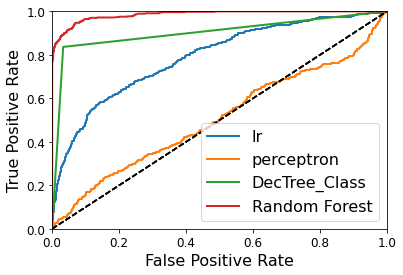

In [220]:
from sklearn import metrics
from sklearn.metrics import roc_curve
def plot_roc_curve_decis(model, name):
    pred = cross_val_predict(model, X_train, Y_train, cv=3, method="decision_function")
    fpr, tpr, thresholds = roc_curve(Y_train, pred)
    m=metrics.auc(fpr, tpr)
    print('AUC - ' +name, m)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

def plot_roc_curve_proba(model, name):
    pred = cross_val_predict(model, X_train, Y_train, cv=3, method="predict_proba")
    fpr, tpr, thresholds = roc_curve(Y_train, pred[:,1])
    m=metrics.auc(fpr, tpr)
    print('AUC - ' +name, m)
    plt.plot(fpr, tpr, linewidth=2, label=name)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

# La courbe ROC est un autre moyen d'évaluer un classifieur binaire. Elle confronte le taux de vrai positif (TPR ou recall) au taux de faux positif

plot_roc_curve_decis(lr, "lr")
plot_roc_curve_decis(perceptron, "perceptron")
plot_roc_curve_proba(DecTree_Class, "DecTree_Class")
plot_roc_curve_proba(rf, "Random Forest")


plt.legend(loc="lower right", fontsize=16)
plt.show()

# Choix du meilleur modéle:

Il y a plusieurs raisons pour lesquelles nous avons choisi le modèle d'apprentissage automatique de l'arbre de décision plutôt que d'autres modèles.



Tout d'abord, l'arbre de décision est un modèle facile à comprendre et à interpréter, ce qui est important pour nous car nous cherchons à expliquer les résultats à des personnes non expertes en apprentissage automatique. De plus, l'arbre de décision offre une représentation graphique intuitive des décisions prises par le modèle, ce qui facilite la compréhension de ses prédictions.

Ensuite, l'arbre de décision est souvent utilisé pour la classification, ce qui est notre cas car nous cherchons à prédire si un employé va quitter l'entreprise ou non. L'arbre de décision permet de diviser l'espace des variables en sous-ensembles homogènes, ce qui permet d'identifier les caractéristiques les plus importantes pour notre problème. Cela nous permet de mieux comprendre les facteurs qui influencent la décision des employés de quitter ou non l'entreprise.


En somme, notre choix de l'arbre de décision est justifié par sa simplicité, sa capacité à traiter des données à la fois numériques et catégoriques, ainsi que par sa capacité à diviser l'espace des variables en sous-ensembles homogènes pour identifier les caractéristiques les plus importantes pour notre problème de classification. Nous pensons que l'arbre de décision est un modèle approprié pour notre problème et nous sommes confiants que nous pourrons en tirer des résultats utiles pour notre entreprise.
 
Nous avons cherché à optimiser notre modèle d'arbre de décision en utilisant une recherche exhaustive des meilleurs paramètres. Après plusieurs essais, nous avons finalement trouvé les paramètres suivants qui produisent les meilleurs résultats pour notre modèle :

criterion: "gini"
splitter: "best"
min_samples_leaf: 2
min_samples_split : 1
Le critère "entropy" mesure la qualité de la division d'un nœud en fonction de l'entropie de la distribution des classes dans les sous-nœuds. Dans notre cas on a choisi « gini » car il est particulièrement utile dans les cas où les classes sont relativement équilibrées, car il a tendance à produire des arbres plus simples et plus faciles à interpréter que le critère d'entropie. De plus, la mesure de Gini a l'avantage de prendre en compte uniquement la distribution des classes dans un nœud donné, sans tenir compte de la distribution des classes dans les sous-nœuds.

Le splitter "best" sélectionne la meilleure division à chaque nœud en fonction du critère de qualité spécifié. Cela garantit que l'arbre est construit avec les divisions les plus pertinentes possibles.

Le paramètre min_samples_leaf est le nombre minimum d'échantillons requis pour être dans une feuille. Avec une valeur de 2, cela signifie que les feuilles doivent contenir au moins 2 échantillons pour être considérées comme valides. En effet, si une feuille ne contient que très peu d'échantillons, l'arbre risque de sur-apprendre et de produire des prédictions erronées sur les données de test. Ainsi, en fixant une valeur minimale pour le nombre d'échantillons dans une feuille, nous nous assurons que l'arbre généralise bien les données et évite le surapprentissage.

Le paramètre min_samples_split est le nombre minimum d'échantillons requis pour diviser un nœud interne. En fixant sa valeur à 1, nous avons choisi une valeur assez basse. Cependant, cela maximise la précision du modèle même. Il est important de noter que la valeur optimale de ce paramètre dépend des caractéristiques spécifiques de l'ensemble de données et qu'une valeur plus élevée peut être nécessaire pour des ensembles de données plus petits ou plus complexes.

En utilisant ces paramètres, notre modèle d'arbre de décision a produit les meilleurs résultats sur nos données de test. Cependant, il est important de noter que ces paramètres peuvent ne pas être optimaux pour tous les ensembles de données et que des ajustements supplémentaires peuvent être nécessaires pour obtenir les meilleurs résultats.



Après avoir effectué une recherche exhaustive des meilleurs hyperparamètres pour notre modèle d'arbre de décision en utilisant la grille de paramètres suivante :

param_grid = [
    {'criterion':["gini", "entropy"] ,
        'splitter': ["best","random"],
        'min_samples_leaf':list(range(1,50)), 
        'min_samples_split': [2,3,4]}
  ]

Nous avons finalement sélectionné les hyperparamètres suivants pour notre modèle :
criterion': 'gini',
'splitter': 'random
 'min_samples_leaf': 1,
 'min_samples_split': 2,

Nous avons choisi le critère "gini" pour mesurer la qualité de la division d'un nœud en fonction de la pureté de la distribution des classes dans les sous-nœuds, car il a donné les meilleurs résultats sur nos données de test.

Nous avons opté pour le splitter "random" qui sélectionne une division aléatoire à chaque nœud. Cela permet d'introduire un certain aléa dans la construction de l'arbre, ce qui peut aider à éviter le surapprentissage.

En ce qui concerne les hyperparamètres de taille de nœud, nous avons décidé de fixer min_samples_leaf à 1, ce qui signifie que chaque feuille de l'arbre doit contenir au moins un échantillon. Cela permet de minimiser la perte d'information en créant un grand nombre de feuilles, mais peut conduire à un risque plus élevé de surapprentissage.

Nous avons également fixé min_samples_split à 2, ce qui signifie que chaque nœud doit contenir au moins deux échantillons avant de pouvoir être divisé en sous-nœuds. Cela permet de limiter le surapprentissage en évitant que des nœuds ne soient divisés en trop peu de sous-nœuds.

En utilisant ces hyperparamètres, nous avons obtenu les meilleurs résultats possibles pour notre modèle d'arbre de décision sur nos données.


# Schématisation de l'arbre de décision:

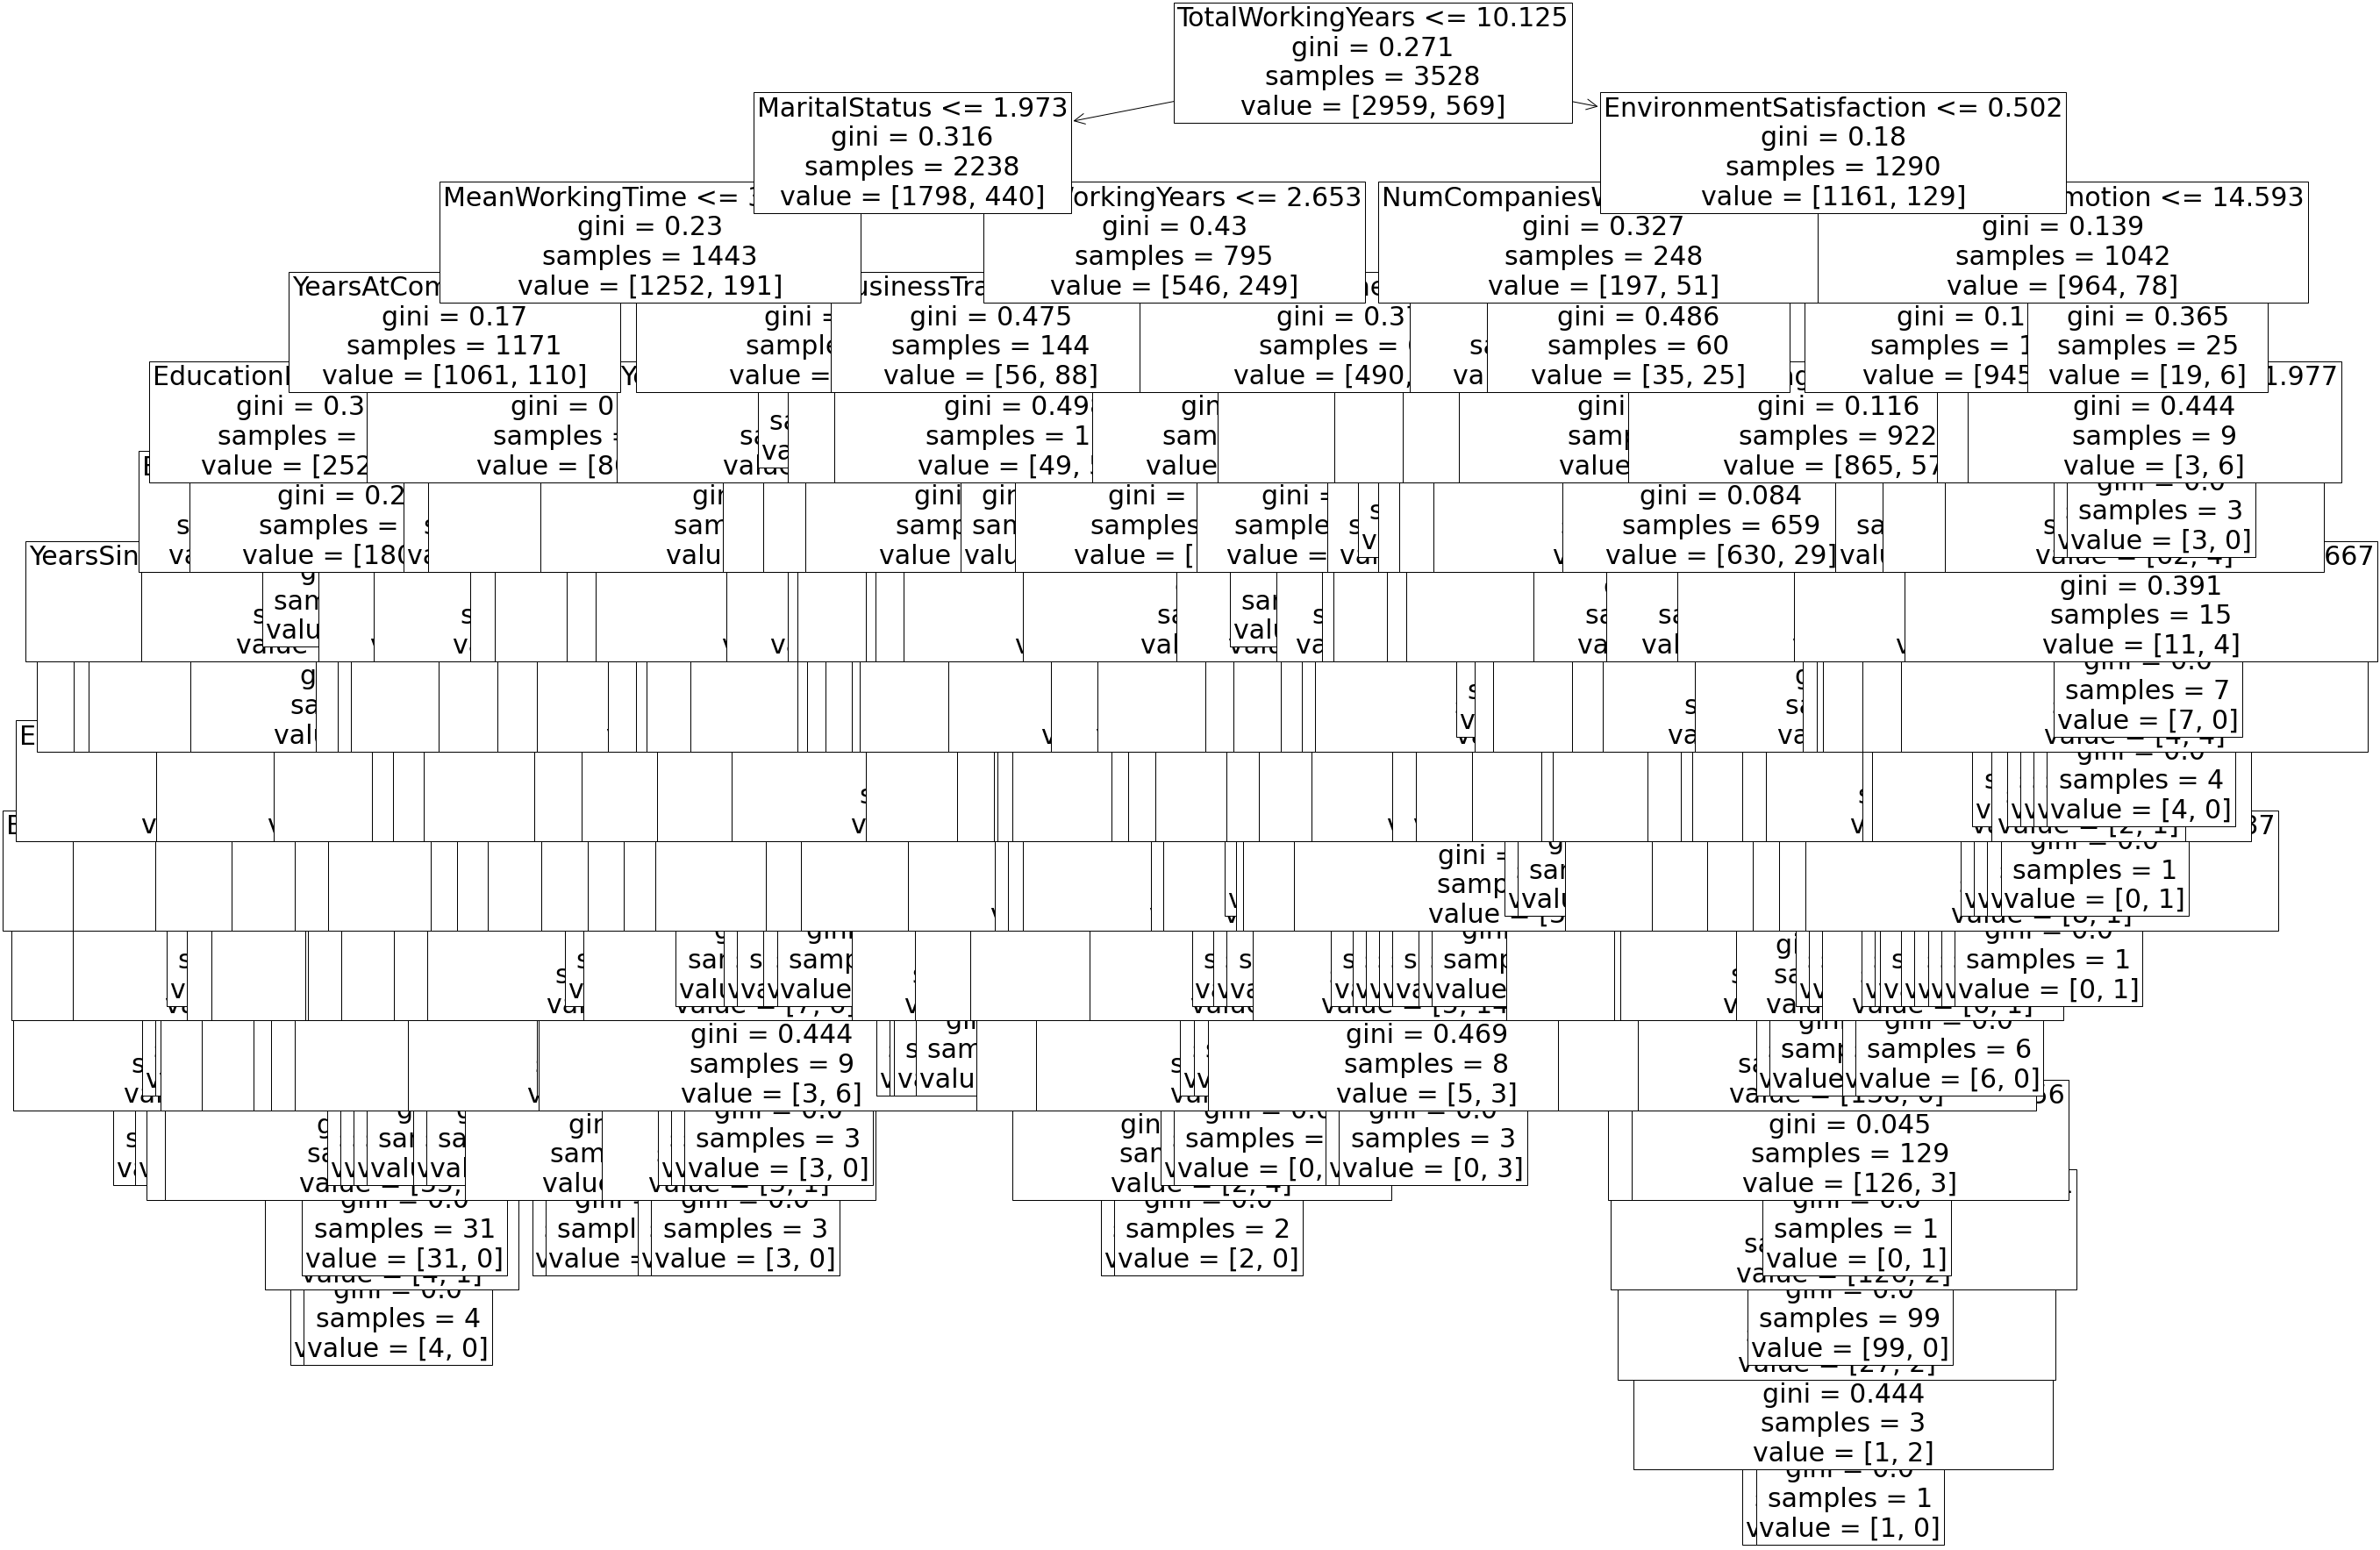

In [222]:
from sklearn import tree
plt.figure(figsize=(40,32))

tree.plot_tree(DecTree_Class, feature_names= X_test.columns,fontsize=30)
tree.export_graphviz(DecTree_Class,
                     out_file="tree.dot",
                     feature_names = X_test.columns,
                     class_names="Attrition",
                     filled = True)